In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from script import CustomModel, Dataset

In [2]:
import tensorflow as tf
#  Check if GPU is available and TensorFlow is using GPU
if tf.test.is_gpu_available():
    print("GPU is available")
    print("TensorFlow is using GPU")
else:
    print("GPU is not available")
    print("TensorFlow is using CPU")
    
# Create a TensorFlow session with GPU options
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available
TensorFlow is using GPU


In [3]:
dataset=Dataset()

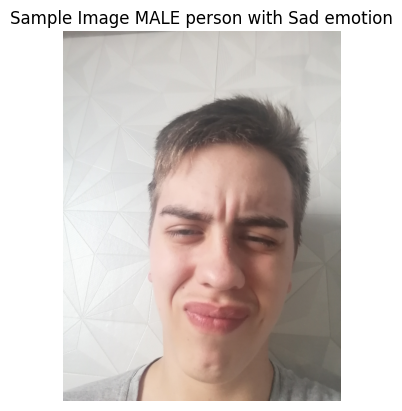

In [4]:
dataset.getSample()

In [5]:
x_train,x_test,y_train,y_test=dataset.generateDataset(train_size=0.8)

In [6]:
model=CustomModel()

Model: "custom_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_images (InputLayer)      [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_images[0][0]']           
                                                                                                  
 flatten (Flatten)              (None, 25088)        0           ['vgg16[0][0]']                  
                                                                                                  
 dense (Dense)                  (None, 128)          3211392     ['flatten[0][0]']     

In [7]:
model.trainModel(x_train,y_train)

Epoch 1/20
4/4 [==============================] - 43s 5s/step - loss: 5.8598 - output_gender_loss: 1.5321 - output_emotion_loss: 4.3277 - output_gender_accuracy: 0.6364 - output_emotion_accuracy: 0.1074
Epoch 2/20
4/4 [==============================] - 2s 567ms/step - loss: 2.6613 - output_gender_loss: 0.2086 - output_emotion_loss: 2.4526 - output_gender_accuracy: 0.9174 - output_emotion_accuracy: 0.1653
Epoch 3/20
4/4 [==============================] - 2s 584ms/step - loss: 2.2217 - output_gender_loss: 0.0791 - output_emotion_loss: 2.1425 - output_gender_accuracy: 0.9752 - output_emotion_accuracy: 0.2479
Epoch 4/20
4/4 [==============================] - 2s 540ms/step - loss: 1.7775 - output_gender_loss: 0.0081 - output_emotion_loss: 1.7695 - output_gender_accuracy: 1.0000 - output_emotion_accuracy: 0.3636
Epoch 5/20
4/4 [==============================] - 2s 542ms/step - loss: 1.7230 - output_gender_loss: 0.0120 - output_emotion_loss: 1.7110 - output_gender_accuracy: 1.0000 - output_em

In [8]:
model.evaluateModel(x_test,y_test)

1/1 [==============================] - 18s 18s/step - loss: 3.9920 - output_gender_loss: 0.0656 - output_emotion_loss: 3.9264 - output_gender_accuracy: 0.9355 - output_emotion_accuracy: 0.0000e+00


(-0.5, 223.5, 223.5, -0.5)

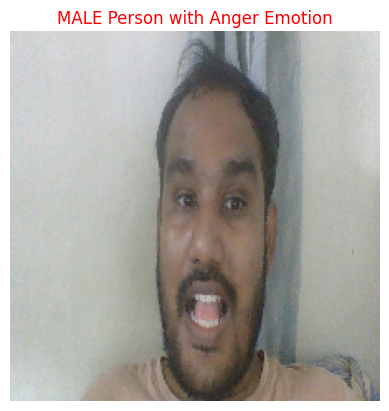

In [9]:
import random
random_idx=random.randint(0,len(x_test))
gender,emotion=model.predictImage(x_test[random_idx])
gender_check=gender==y_test[random_idx][0]
emotion_check=emotion==y_test[random_idx][1]
checker=gender_check and emotion_check
plt.imshow(x_test[random_idx])
plt.title(f'{dataset.gender_idx[gender]} Person with {dataset.emotion_idx[emotion]} Emotion',color='green' if checker else 'red')
plt.axis('off')

In [10]:
model.stream(dataset.gender_idx,dataset.emotion_idx)